In [ ]:
from neuronunit import tests as nu_tests, neuroelectro
from neuronunit.tests import passive, waveform, fi
#neuron = {'nlex_id': 'nifext_50'} # Layer V pyramidal cell
cholinergic = {'neuron':'115'}
import neuronunit
#print(dir(neuronunit))
#print(dir(neuroelectro))
print(dir(neuroelectro.NeuroElectroData))



from neuronunit.tests import dynamics import ISITest, LocalVariationTest
cholinergic = {'neuron':115}

#observation =  cls.neuroelectro_summary_observation(fi_basket)
test_class_params = [(fi.RheobaseTest,None),
                 (dynamics.ISITest,None),
                 (dynamics.LocalVariationTest,None),]#,
#inh_observations = []
#for cls,params in test_class_params:
#    inh_observations.append(cls.neuroelectro_summary_observation(cholinergic))

params = {}
params['n']=115
neuroelectro.NeuroElectroData.set_neuron('115')
cholinergic = neuroelectro.neuroelectro_summary_observation()
print(cholinergic)
#0.19  ± 0.10
prediction['std'] = 0.10
prediction['mean'] =0.19

In [ ]:


import pickle
import numpy as np
from neuronunit.tests.dynamics import ISITest, LocalVariationTest
!pip install pyspike

import pyspike
import matplotlib as mpl
import matplotlib.pyplot as plt

import pyspike as spk
with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:

  #with open('pickles/membrane_dynamics_file.p', 'rb') as f:
  mdf1 = pickle.load(f)
  print(mdf1)

def run_test(self, cls, pred =None):
    observation = self.get_observation(cls)
    test = cls(observation=observation)
    score = test.judge(self.model,stop_on_error = True, deep_error = True)
    return score



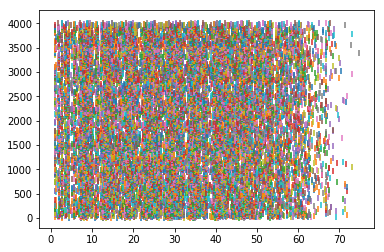

In [2]:
import pickle
import numpy as np
from neuronunit.tests.dynamics import ISITest, LocalVariationTest
!pip install pyspike

import pyspike
import matplotlib as mpl
import matplotlib.pyplot as plt

import pyspike as spk
with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:

  #with open('pickles/membrane_dynamics_file.p', 'rb') as f:
  mdf1 = pickle.load(f)
  print(mdf1)

with open('pickles/membrane_dynamics_hippocampome_file.p', 'rb') as f:
  mdf2 = pickle.load(f)
  print(mdf2)

try:
    with open('membrane_dynamics_balanced_file.p', 'rb') as f:
       mdf3 = pickle.load(f)
       print(mdf3)

    with open('membrane_dynamics_file.p','rb') as f:
       mdf = pickle.load(f)

    with open('pickles/membrane_dynamics_balanced_file.p', 'rb') as f:
       mdf0 = pickle.load(f)
       print(mdf0)

except:
   pass



# first load the data, interval ending time = 4000, start=0 (default)
#spike_trains_txt = spk.load_spike_trains_from_txt("PySpike_testdata.txt", 4000)
tstop = 100
spike_trains = []
for spiketrain in mdf1.spiketrains:
    y = np.ones_like(spiketrain) * spiketrain.annotations['source_id']
    # argument edges is the time interval you want to be considered.
    pspikes = pyspike.SpikeTrain(spiketrain,edges=(0,tstop))
    spike_trains.append(pspikes)
#spike_trains = wrangled_trains


# plot the spike times
for (i, spike_train) in enumerate(spike_trains):
    plt.scatter(spike_train, i*np.ones_like(spike_train), marker='|')

# profile of the first two spike trains
f = spk.isi_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()


    

#plt.savefig('the distances')

In [3]:

#observation =  neuronunit.neuroelectro_summary_observation("https://neuroelectro.org/data_table/3099/")
#tisi = ISITest(observation)
#score = self.run_test(T,pred=self.rheobase)

#dir(tisis)
#tisi.prediction
#tlvt = LocalVariationTest()
#tlvt.prediction


ISI-distance: 0.14878768
SPIKE-distance: 0.11172091


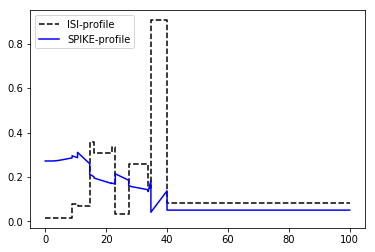

In [4]:
plt.figure()
plt.plot(x, np.abs(y), '--k', label="ISI-profile")
print("ISI-distance: %.8f" % f.avrg())
f = spk.spike_profile(spike_trains, indices=[0, 1])
x, y = f.get_plottable_data()
plt.plot(x, y, '-b', label="SPIKE-profile")
print("SPIKE-distance: %.8f" % f.avrg())
plt.legend(loc="upper left")
plt.show()

Average: 0.923076923077
Average: 0.444245559313


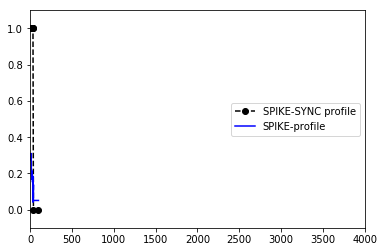

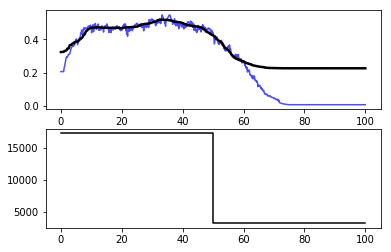

In [5]:
plt.figure()

f = spk.spike_sync_profile(spike_trains[0], spike_trains[1])
x, y = f.get_plottable_data()
plt.plot(x, y, '--ok', label="SPIKE-SYNC profile")
#print(f.x)
#print(f.y)
#print(f.mp)

print("Average:", f.avrg())


f = spk.spike_profile(spike_trains[0], spike_trains[1])
x, y = f.get_plottable_data()

plt.plot(x, y, '-b', label="SPIKE-profile")

plt.axis([0, 4000, -0.1, 1.1])
plt.legend(loc="center right")

plt.figure()

plt.subplot(211)

f = spk.spike_sync_profile(spike_trains)
x, y = f.get_plottable_data()
plt.plot(x, y, '-b', alpha=0.7, label="SPIKE-Sync profile")

x1, y1 = f.get_plottable_data(averaging_window_size=50)
plt.plot(x1, y1, '-k', lw=2.5, label="averaged SPIKE-Sync profile")

plt.subplot(212)

f_psth = spk.psth(spike_trains, bin_size=50.0)
x, y = f_psth.get_plottable_data()
plt.plot(x, y, '-k', alpha=1.0, label="PSTH")


print("Average:", f.avrg())

plt.show()

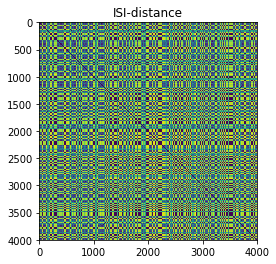

In [ ]:

#print(spike_trains)
plt.figure()
isi_distance = spk.isi_distance_matrix(spike_trains)
plt.imshow(isi_distance, interpolation='none')
plt.title("ISI-distance")
plt.show()

In [ ]:


plt.figure()
spike_distance = spk.spike_distance_matrix(spike_trains, interval=(0, tstop))
plt.imshow(spike_distance, interpolation='none')
plt.title("SPIKE-distance, T=0-1000")
plt.show()

In [ ]:

plt.figure()
spike_sync = spk.spike_sync_matrix(spike_trains, interval=(0, tstop))
plt.imshow(spike_sync, interpolation='none')
plt.title("SPIKE-Sync, T=2000-4000")
plt.show()